## Research Question
#### Among the weather variables including month, precipitation type, temperature, humidity, wind speed, wind bearing and visibility in the Szeged area in 2016, which combination of variables can best predict the apparent temperature?

In [1]:
# Run this cell before continuing.
library(tidyverse)
library(repr)
library(infer)
library(cowplot)
library(broom)
library(GGally)
library(dplyr)

# Set.seed for reproducibility.
set.seed(50)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘cowplot’


The following object is masked from ‘package:lubridate’:

    stamp


Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2



In [2]:
# Read the data
weather_data <- read_delim("https://raw.githubusercontent.com/VivaanWadhwa/STAT306_E6_Project/main/weatherHistory.csv", 
                         delim = ",", 
                         col_names = TRUE)

head(weather_data)
tail(weather_data)
colnames(weather_data)

Rows: 96453 Columns: 12
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): Formatted Date, Summary, Precip Type, Daily Summary
dbl (8): Temperature (C), Apparent Temperature (C), Humidity, Wind Speed (km...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251,15.8263,0,1015.13,Partly cloudy throughout the day.
2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259,15.8263,0,1015.63,Partly cloudy throughout the day.
2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204,14.9569,0,1015.94,Partly cloudy throughout the day.
2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269,15.8263,0,1016.41,Partly cloudy throughout the day.
2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259,15.8263,0,1016.51,Partly cloudy throughout the day.
2006-04-01 05:00:00.000 +0200,Partly Cloudy,rain,9.222222,7.111111,0.85,13.9587,258,14.9569,0,1016.66,Partly cloudy throughout the day.


Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
2016-09-09 18:00:00.000 +0200,Partly Cloudy,rain,28.83889,27.85000,0.32,12.2038,21,16.1000,0,1014.07,Partly cloudy starting in the morning.
2016-09-09 19:00:00.000 +0200,Partly Cloudy,rain,26.01667,26.01667,0.43,10.9963,31,16.1000,0,1014.36,Partly cloudy starting in the morning.
2016-09-09 20:00:00.000 +0200,Partly Cloudy,rain,24.58333,24.58333,0.48,10.0947,20,15.5526,0,1015.16,Partly cloudy starting in the morning.
2016-09-09 21:00:00.000 +0200,Partly Cloudy,rain,22.03889,22.03889,0.56,8.9838,30,16.1000,0,1015.66,Partly cloudy starting in the morning.
2016-09-09 22:00:00.000 +0200,Partly Cloudy,rain,21.52222,21.52222,0.60,10.5294,20,16.1000,0,1015.95,Partly cloudy starting in the morning.
2016-09-09 23:00:00.000 +0200,Partly Cloudy,rain,20.43889,20.43889,0.61,5.8765,39,15.5204,0,1016.16,Partly cloudy starting in the morning.


[1] "Formatted Date"           "Summary"                 
 [3] "Precip Type"              "Temperature (C)"         
 [5] "Apparent Temperature (C)" "Humidity"                
 [7] "Wind Speed (km/h)"        "Wind Bearing (degrees)"  
 [9] "Visibility (km)"          "Loud Cover"              
[11] "Pressure (millibars)"     "Daily Summary"

In [4]:
# Change the column name
weather_data <- weather_data %>%
  rename(
    time = `Formatted Date`,
    summary = `Summary`,
    precipType = `Precip Type`,
    temperature = `Temperature (C)`,
    apparentTemperature = `Apparent Temperature (C)`,
    humidity = `Humidity`,
    windSpeed = `Wind Speed (km/h)`,
    windBearing = `Wind Bearing (degrees)`,
    visibility = `Visibility (km)`,
    loudCover = `Loud Cover`,
    pressure = `Pressure (millibars)`,
    dailySummary = `Daily Summary`
  )

head(weather_data)

time,summary,precipType,temperature,apparentTemperature,humidity,windSpeed,windBearing,visibility,loudCover,pressure,dailySummary
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251,15.8263,0,1015.13,Partly cloudy throughout the day.
2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259,15.8263,0,1015.63,Partly cloudy throughout the day.
2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204,14.9569,0,1015.94,Partly cloudy throughout the day.
2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269,15.8263,0,1016.41,Partly cloudy throughout the day.
2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259,15.8263,0,1016.51,Partly cloudy throughout the day.
2006-04-01 05:00:00.000 +0200,Partly Cloudy,rain,9.222222,7.111111,0.85,13.9587,258,14.9569,0,1016.66,Partly cloudy throughout the day.


In [5]:
# Convert time format
weather_data$time <- as.Date(weather_data$time, format="%Y-%m-%d %H:%M:%S")

head(weather_data)
nrow(weather_data)

time,summary,precipType,temperature,apparentTemperature,humidity,windSpeed,windBearing,visibility,loudCover,pressure,dailySummary
<date>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
2006-04-01,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251,15.8263,0,1015.13,Partly cloudy throughout the day.
2006-04-01,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259,15.8263,0,1015.63,Partly cloudy throughout the day.
2006-04-01,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204,14.9569,0,1015.94,Partly cloudy throughout the day.
2006-04-01,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269,15.8263,0,1016.41,Partly cloudy throughout the day.
2006-04-01,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259,15.8263,0,1016.51,Partly cloudy throughout the day.
2006-04-01,Partly Cloudy,rain,9.222222,7.111111,0.85,13.9587,258,14.9569,0,1016.66,Partly cloudy throughout the day.


[1] 96453

In [6]:
# Reduce the number of data points by selecting data points for 2016
weather2016_data <- weather_data[weather_data$time >= as.Date("2016-01-01") & weather_data$time <= as.Date("2016-12-31"), ]

head(weather2016_data)
nrow(weather2016_data)

time,summary,precipType,temperature,apparentTemperature,humidity,windSpeed,windBearing,visibility,loudCover,pressure,dailySummary
<date>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
2016-04-01,Partly Cloudy,rain,11.80556,11.80556,0.71,13.8943,170,16.1000,0,1014.14,Mostly cloudy throughout the day.
2016-04-01,Partly Cloudy,rain,11.80556,11.80556,0.71,10.9963,172,16.1000,0,1013.95,Mostly cloudy throughout the day.
2016-04-01,Partly Cloudy,rain,11.44444,11.44444,0.74,12.9444,192,15.1823,0,1013.31,Mostly cloudy throughout the day.
2016-04-01,Mostly Cloudy,rain,10.71667,10.71667,0.77,11.0446,171,16.1000,0,1013.03,Mostly cloudy throughout the day.
2016-04-01,Mostly Cloudy,rain,10.23333,10.23333,0.79,13.9265,162,16.1000,0,1012.64,Mostly cloudy throughout the day.
2016-04-01,Mostly Cloudy,rain,11.00000,11.00000,0.79,12.2521,179,15.1823,0,1012.35,Mostly cloudy throughout the day.


[1] 8784

We decide to remove `summary` and `dailySummary` due to potential redundancy and complexity in processing textual data, and `loudCover` will be removed since it does not vary or provide any meaningful variation to the model.

In [7]:
# transform time into more informative features like month
weather2016_data$month <- month(weather2016_data$time)

# Remove summary, dailySummary and cloudCover from dataframe weather_data
weather2016_data <- weather2016_data %>%
    select(-time, -summary, -dailySummary, -loudCover) %>%
    select(month, everything()) %>%
    arrange(month)

head(weather2016_data)
tail(weather2016_data)

month,precipType,temperature,apparentTemperature,humidity,windSpeed,windBearing,visibility,pressure
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,snow,-6.361111,-9.361111,0.82,6.0858,121,15.8263,1032.01
1,snow,-7.900000,-7.900000,0.89,3.2200,140,14.8764,1031.85
1,snow,-8.522222,-11.827778,0.88,6.0536,138,15.7297,1031.62
1,snow,-8.561111,-12.072222,0.88,6.4400,140,15.7297,1031.31
1,snow,-8.577778,-11.644444,0.92,5.5867,137,14.0875,1031.04
1,snow,-9.144444,-9.144444,0.92,3.2200,180,14.8120,1030.82


month,precipType,temperature,apparentTemperature,humidity,windSpeed,windBearing,visibility,pressure
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
12,rain,2.8333333,0.03333333,0.84,10.2396,168,8.4364,1019.13
12,rain,2.2555556,-0.53333333,0.86,9.7244,166,8.2432,1019.34
12,rain,1.7777778,-1.04444444,0.88,9.4990,167,7.4704,1019.58
12,rain,1.4111111,-1.48333333,0.90,9.4990,170,9.7888,1019.80
12,rain,1.1277778,-1.83888889,0.91,9.5795,174,8.6135,1019.96
12,rain,0.8777778,-2.15000000,0.93,9.6278,179,9.0804,1020.03


Aggregate the data points by `month` and then plot the average `temperature` and `apparentTemperature` of these aggregated values.

`geom_line()`: Each group consists of only one observation.
ℹ Do you need to adjust the group aesthetic?


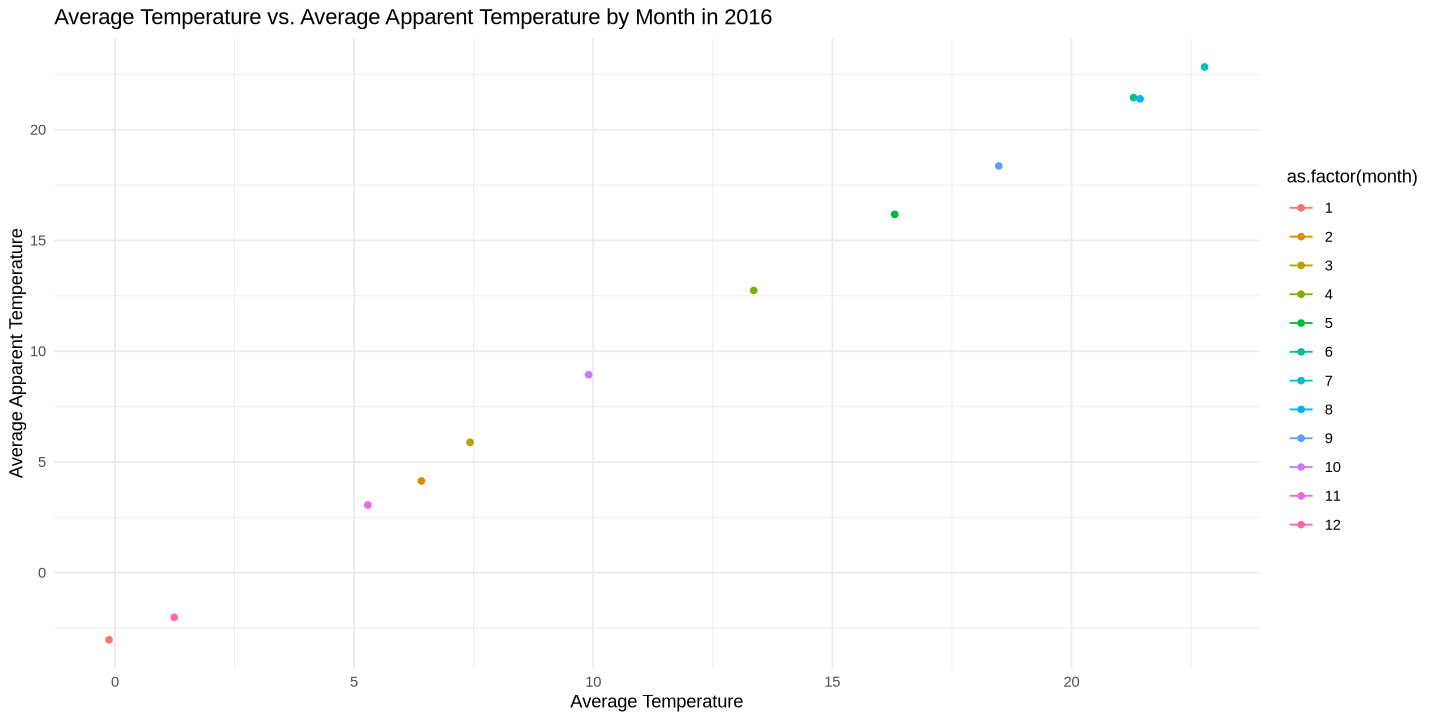

In [8]:
options(repr.plot.width = 12, repr.plot.height = 6)

average2016_data <- weather2016_data %>%
  group_by(month) %>%
  summarise(average_temperature = mean(temperature, na.rm = TRUE),
            average_apparentTemperature = mean(apparentTemperature, na.rm = TRUE))

ggplot(average2016_data, aes(x = average_temperature, y = average_apparentTemperature, group = month)) + 
    geom_line(aes(color = as.factor(month))) + 
    geom_point(aes(color = as.factor(month))) +
    theme_minimal() +
    labs(title = "Average Temperature vs. Average Apparent Temperature by Month in 2016", x = "Average Temperature", y = "Average Apparent Temperature")

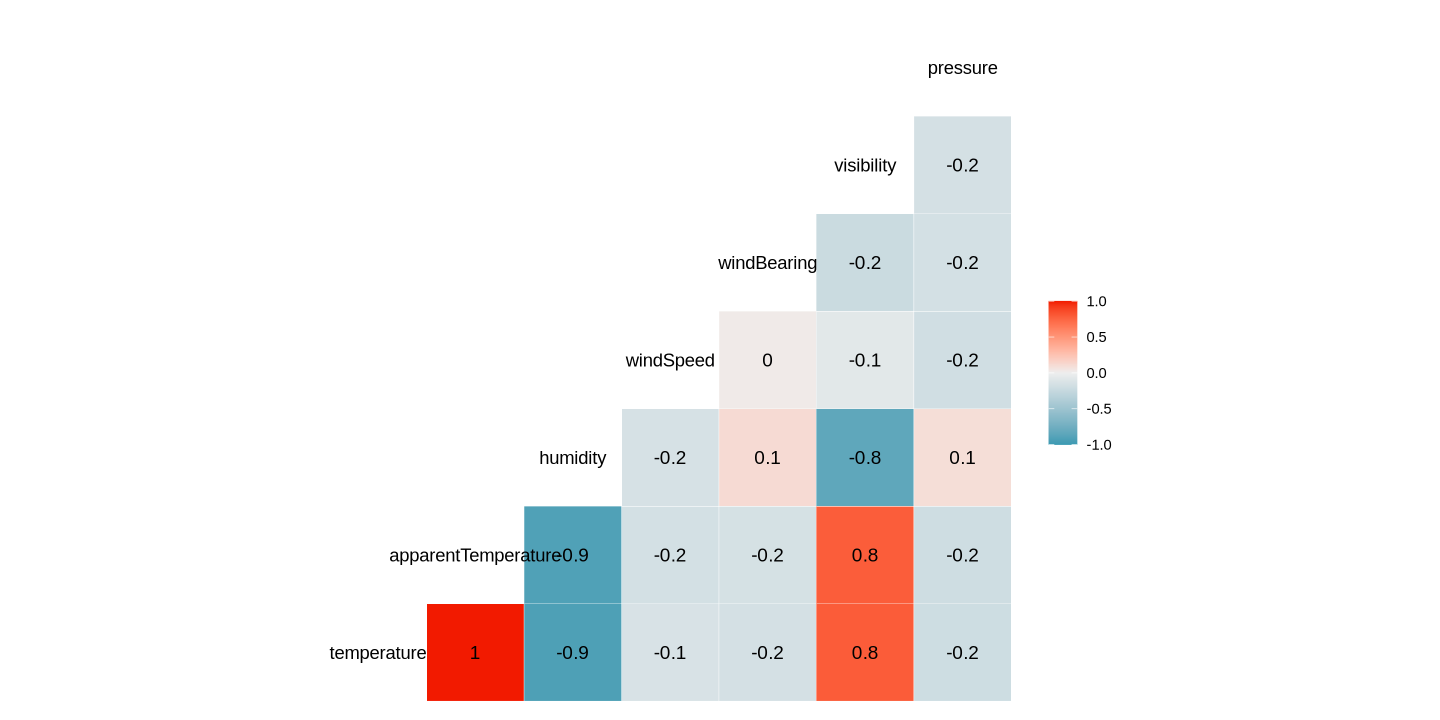

In [9]:
# Remove non-numeric columns for correlation analysis
weather2016_data %>%
  select(-month, -precipType) %>%
  cor() %>%
  GGally::ggcorr(label = TRUE) +
  theme_minimal()